In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Directorios
base_dir = "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test"
test_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new_train_and_test/test")

# Generación de datos de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

# Cargar el modelo entrenado
model = load_model("saved-model-30-stage2.keras")

Found 957 images belonging to 16 classes.


C:\Users\alex_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 386 variables whereas the saved optimizer has 82 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


C:\Users\alex_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 745ms/step


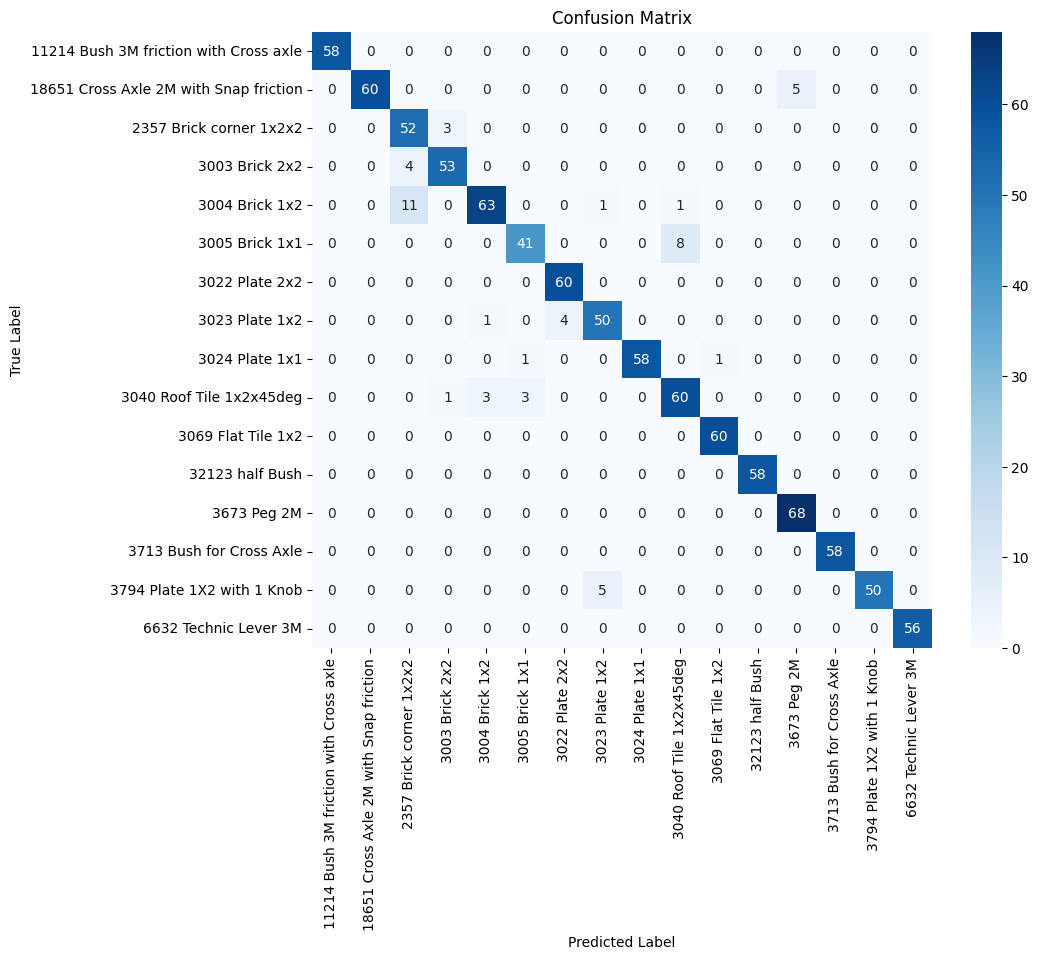

In [3]:
# Evaluación del modelo
predictions = model.predict(test_generator) # Probabilidades de las clases
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Informe de clasificación
class_names = sorted(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred, target_names=class_names)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Obtén las primeras 9 imágenes y etiquetas del generador de pruebas
images, labels = next(test_generator)

# Se hacen predicciones para estas imágenes
predictions = model.predict(images)

# Convierte las predicciones a clases
predicted_classes = np.argmax(predictions, axis=1)

# Convierte las etiquetas verdaderas a clases
true_classes = np.argmax(labels, axis=1)

# Se imprimen las primeras 9 predicciones y las etiquetas verdaderas
for i in range(60):
  print(f"Image {i+1}:") #Podemos cambiar el rango para ver más imágenes :D
  print(f"Predicted class: {class_names[predicted_classes[i]]}")
  print(f"True class: {class_names[true_classes[i]]}")
  print()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step
Image 1:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 2:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 3:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 4:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 5:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 6:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 7:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 8:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 9:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 10:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Image 11:
Predicted class: 2357 Brick corner 1x2x2
True class: 2357 Brick corner 1x2x2

Im

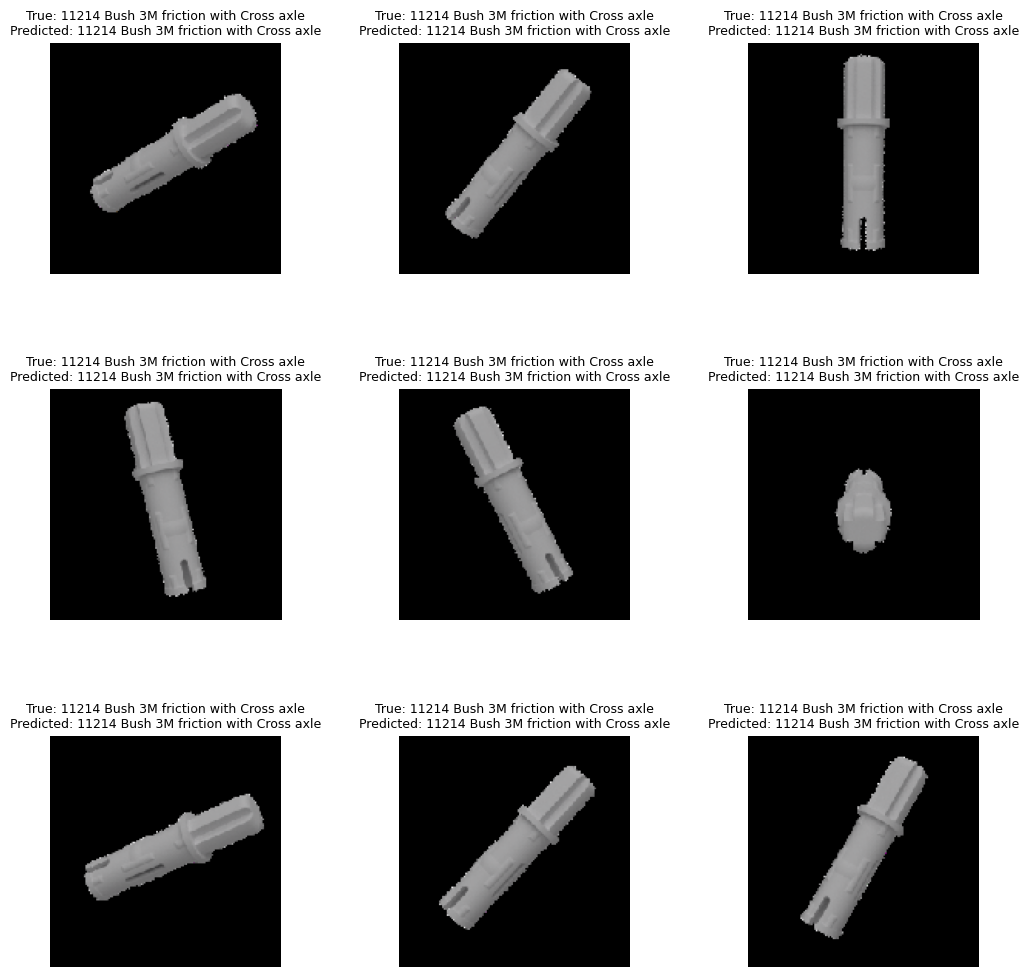

In [19]:
# Visualizamos algunas imágenes con sus predicciones
plt.figure(figsize=(12, 12))
start_index = 40  # Cambia este valor al índice de inicio que desees
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + start_index])
    plt.title(f"True: {class_names[true_classes[i + start_index]]}\nPredicted: {class_names[predicted_classes[i + start_index]]}", fontsize=9)
    plt.axis('off')
        
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Para ajustar el espacio entre las imágenes
plt.show()